In [1]:
import pandas as pd

DATA = '/kaggle/input/mental-heath-analysis-among-teenagers/mental_health_analysis.csv'
df = pd.read_csv(filepath_or_buffer=DATA, index_col=['User_ID'])
df.head()

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
User_ID,,,,,,,,,,
1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor


How many rows do we have?

In [2]:
len(df)

5000

The fact that we have a big round number of rows is a clue that we may have synthetic data. Let's look at the distributions of some of our variables and see if they further suggest our data is synthetic.

In [3]:
df['Age'].value_counts().to_frame().sort_index().T

Age,13,14,15,16,17,18
count,870,803,812,842,852,821


In [4]:
df['Survey_Stress_Score'].value_counts().to_frame().sort_index().T

Survey_Stress_Score,1,2,3,4,5
count,981,1004,987,1011,1017


<Axes: xlabel='Survey_Stress_Score', ylabel='Age'>

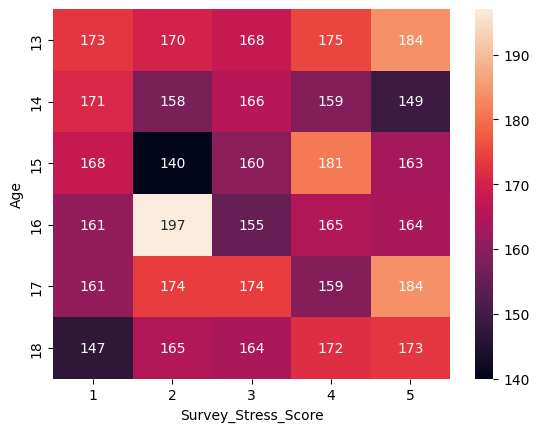

In [5]:
from seaborn import heatmap

heatmap(annot=True, fmt='3', data=df[['Age', 'Survey_Stress_Score']].value_counts().to_frame().reset_index().pivot(index='Age', columns='Survey_Stress_Score', values='count'))

Our age bins and score bins look uniform with some random variation, and taken together they show more variation.

<Axes: xlabel='Support_System', ylabel='Gender'>

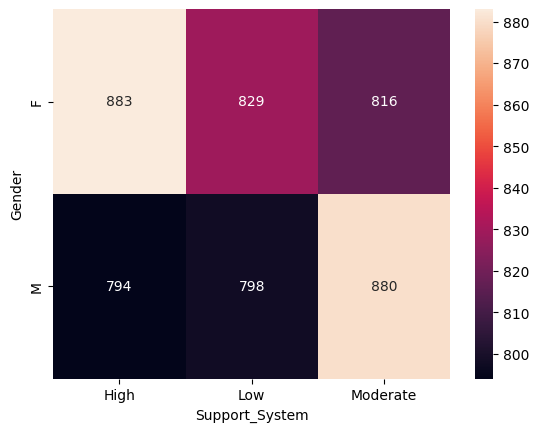

In [6]:
heatmap(annot=True, fmt='3', data=df[['Gender', 'Support_System']].value_counts().to_frame().reset_index().pivot(index='Gender', columns='Support_System', values='count'))

Our Gender vs. Support System distribution looks uniform too.

<Axes: xlabel='Social_Media_Hours', ylabel='Screen_Time_Hours'>

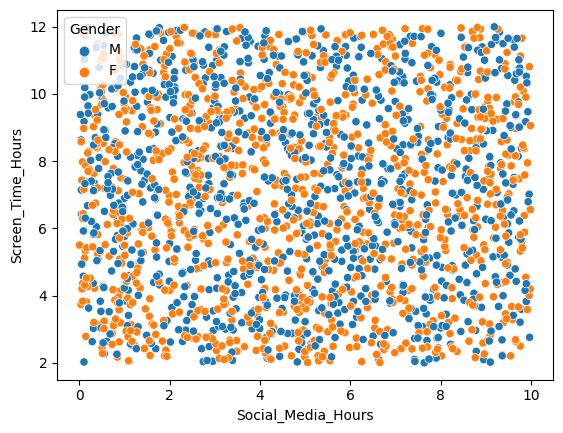

In [7]:
from seaborn import scatterplot

scatterplot(data=df.sample(n=2000, random_state=2025), x='Social_Media_Hours', y='Screen_Time_Hours', hue='Gender')

<Axes: xlabel='Exercise_Hours', ylabel='Sleep_Hours'>

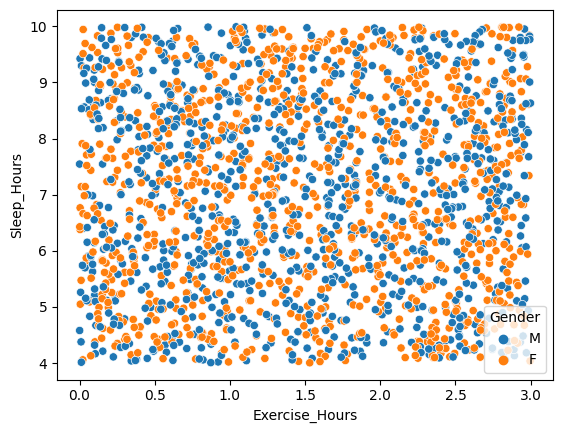

In [8]:
scatterplot(data=df.sample(n=2000, random_state=2025), x='Exercise_Hours', y='Sleep_Hours', hue='Gender')

Both of these plots look like uniform random variables. It's hard to believe anyone is getting e.g. four hours of sleep and three hours of exercise every day. Let's look at our Pearson correlations.

<Axes: >

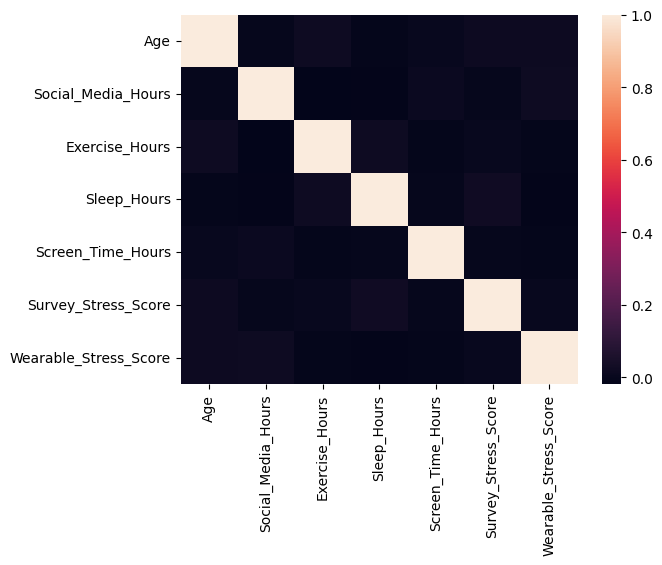

In [9]:
heatmap(data=df.corr(numeric_only=True))

This is definitely synthetic data; all of our numeric data is uncorrelated.